## 1. 机器学习理论基础

本次比赛的技术部分主要用到了机器学习中的两个著名算法：逻辑回归和决策树。这两种算法都属于机器学习中“分类算法”（classification）。当分类任务中只有两个类别时，我们又可更具体称它为“二分类”问题。

二分类（binaray classification）：表示分类任务中有两个类别，比如我们想识别一幅图片是不是猫。也就是说，训练一个分类器，输入一幅图片，用特征向量x表示，输出是不是猫，用y=0或1表示。二类分类是假设每个样本都被设置了一个且仅有一个标签 0 或者 1。


<img src="image_bi.png" alt="Drawing" style="width: 500px;"/>

显然我们本次的任务就是一个二分类问题。我们需要基于每只幼犬的行为表现数据，来预测它未来能否被成功训练成导盲犬（标签 0: 成功， 标签 1: 失败）

下面，简单学习下我们用到的算法。

### 1.1 线性回归 （Linear Regression）

线性回归是逻辑回归算法的基础，只有先理解线性回归，才能更好地使用逻辑回归。

相关学习视频：

https://www.bilibili.com/video/BV1sJ411z7zJ?spm_id_from=333.999.0.0

### 1.2 逻辑回归 (Logistic Regression)

相关学习视频：

https://www.bilibili.com/video/BV1PJ411676g?spm_id_from=333.999.0.0

### 1.3 决策树 (Decision Tree)

相关学习视频，观看前八分钟即可：

https://www.bilibili.com/video/BV1T7411b7DG?spm_id_from=333.999.0.0

## 2. 数据集（Dataset）

本次比赛我们的一个重要假设是，可以通过国内导盲犬基地收集的幼犬信息来预测它们未来是否能成功毕业。首先，我们利用国外论文中的公开数据集来验证我们猜想的可行性。

第一步，使用pandas在jupyter notebook中载入数据集，看看它长什么样子。

In [76]:
import pandas as pd
df = pd.read_excel ('Bray et al Raw Data.xlsx', sheet_name=1) 
df

,Puppy,Failure,Litter,MomBreed,PupSex,BirthSeason,PupBreed,LitterSz,Parity,TestAge,...,YAPCDogMagAccu,YAPCDogTor,YACyl,YAPCDetour,YAPCGreet,YARetrieval,YAPCNovObjWary,YAPCNovObjQ,YAPCUmReactive,YAPCUmRecovery
0,1,0,M01,Labrador Retriever,1,1,Labrador Retriever,6,4,16,...,0.582376,-1.554720,0.835880,-0.355068,-2.723217,-1.665225,0.096176,-1.086402,-0.544594,1.718185
1,2,1,M01,Labrador Retriever,1,1,Labrador Retriever,6,4,16,...,-1.054173,-0.570816,0.835880,0.011265,0.476736,0.218065,-0.386313,-0.260348,-0.276458,-2.145987
2,3,0,M01,Labrador Retriever,1,1,Labrador Retriever,6,4,16,...,-0.235856,-0.086282,-0.491396,-0.619230,0.328434,0.218065,-0.019516,-0.394687,-0.655979,0.152662
3,5,0,M01,Labrador Retriever,0,1,Labrador Retriever,6,4,16,...,-1.011024,0.164173,0.835880,0.085640,0.328434,0.971381,-0.084651,0.191875,-0.196075,-0.569487
4,6,0,M01,Labrador Retriever,0,1,Labrador Retriever,6,4,16,...,1.355550,0.954189,0.835880,-0.518254,0.223737,-0.911909,-0.165498,-1.099190,-1.472208,-0.268400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,128,1,M20,Labrador Retriever,0,0,Labrador Retriever,7,3,14,...,-0.179368,-1.090281,0.172242,0.055901,-0.491654,-1.288567,-0.362195,1.099117,0.401800,-1.508280
94,129,0,M20,Labrador Retriever,0,0,Labrador Retriever,7,3,14,...,1.342730,-0.246366,-0.491396,-0.694466,0.509894,0.218065,-0.371748,1.114809,1.080059,-0.870573
95,130,0,M21,German Shepherd,1,0,German Shepherd,4,3,15,...,0.595825,-0.221989,-0.491396,1.078718,0.867589,0.218065,2.329152,-1.746343,-0.426027,-0.208412
96,132,0,M21,German Shepherd,0,0,German Shepherd,4,3,15,...,0.566571,-1.170399,0.172242,1.084546,-0.310195,0.218065,-0.117177,-0.765317,-0.058104,-0.786131


接下来，我们对数据进行初步的清洗。我们需要填充缺失值以及去掉不需要的特征。

In [77]:
# 数据中存在一些缺失值，比如某只幼犬可能少了某项测试的特征值。一般而言，我们对于有缺失值的单个数据都会将其删除，
# 但由于本次数据量比较少，每个数据都很珍贵，因此在这里我选择用其他幼犬的对应特征的平均值进行填充
df = df.fillna(df.mean())
# 删掉一些作用不大的特征列
df = df.drop(["Puppy","Litter","MomBreed","PupSex","BirthSeason","PupBreed","LitterSz","Parity","TestAge"], axis=1)

让我们看下清洗后的数据长啥样。

In [78]:
df

,Failure,Nurse7.1Wk2ONLY,ZOriWk2ONLY,ZLGWk2ONLY,ZVertWk2ONLY,ZVentWk2ONLY,ZLatWk2ONLY,ZWWk2Only,ZConWk2ONLY,YAPCIsoAnx,...,YAPCDogMagAccu,YAPCDogTor,YACyl,YAPCDetour,YAPCGreet,YARetrieval,YAPCNovObjWary,YAPCNovObjQ,YAPCUmReactive,YAPCUmRecovery
0,0,-0.003596,0.237856,-0.144772,-0.356934,-0.731558,0.232048,0.309258,0.170839,3.201906,...,0.582376,-1.554720,0.835880,-0.355068,-2.723217,-1.665225,0.096176,-1.086402,-0.544594,1.718185
1,1,-0.003596,0.237856,-0.144772,-0.356934,-0.731558,0.232048,0.309258,0.170839,-1.301303,...,-1.054173,-0.570816,0.835880,0.011265,0.476736,0.218065,-0.386313,-0.260348,-0.276458,-2.145987
2,0,-0.003596,0.237856,-0.144772,-0.356934,-0.731558,0.232048,0.309258,0.170839,0.830038,...,-0.235856,-0.086282,-0.491396,-0.619230,0.328434,0.218065,-0.019516,-0.394687,-0.655979,0.152662
3,0,-0.003596,0.237856,-0.144772,-0.356934,-0.731558,0.232048,0.309258,0.170839,0.438366,...,-1.011024,0.164173,0.835880,0.085640,0.328434,0.971381,-0.084651,0.191875,-0.196075,-0.569487
4,0,-0.003596,0.237856,-0.144772,-0.356934,-0.731558,0.232048,0.309258,0.170839,0.720936,...,1.355550,0.954189,0.835880,-0.518254,0.223737,-0.911909,-0.165498,-1.099190,-1.472208,-0.268400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1,-0.488214,-1.116203,-0.922652,-0.356934,-0.632026,0.021095,0.383557,-0.057793,-1.094861,...,-0.179368,-1.090281,0.172242,0.055901,-0.491654,-1.288567,-0.362195,1.099117,0.401800,-1.508280
94,0,-0.488214,-1.116203,-0.922652,-0.356934,-0.632026,0.021095,0.383557,-0.057793,-0.857494,...,1.342730,-0.246366,-0.491396,-0.694466,0.509894,0.218065,-0.371748,1.114809,1.080059,-0.870573
95,0,-0.829279,-1.030231,0.503461,-0.356934,-0.632026,-0.465718,-1.263951,-0.934218,-0.143001,...,0.595825,-0.221989,-0.491396,1.078718,0.867589,0.218065,2.329152,-1.746343,-0.426027,-0.208412
96,0,-0.829279,-1.030231,0.503461,-0.356934,-0.632026,-0.465718,-1.263951,-0.934218,-1.087864,...,0.566571,-1.170399,0.172242,1.084546,-0.310195,0.218065,-0.117177,-0.765317,-0.058104,-0.786131


我们可以通过下面的代码查看下两种标签的分布情况：幼犬中有多少成功了，有多少失败了。

<AxesSubplot:>

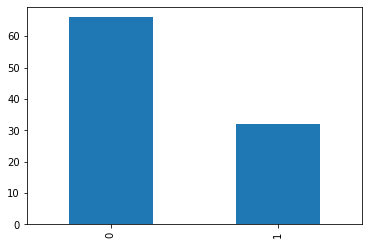

In [79]:
df['Failure'].value_counts().plot(kind="bar")

## 3. 模型训练与测试（Trainning and Testing）

### 3.1 训练集和测试集

从数据集中提取出特征（feature）和标签（target）。在本项目中，特征为幼犬行为学数据，标签为它们是否成功毕业（0或1）

In [80]:
# Split the data into features and target
features = df.drop("Failure", axis=1)
targets = df["Failure"]

### 3.2 sklearn

sklearn是一个Python第三方提供的非常强力的机器学习库，它包含了从数据预处理到训练模型的各个方面。在实战使用sklearn中可以极大的节省我们编写代码的时间以及减少我们的代码量

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

将数据集分类两个部分，一部分用来训练数据，一部分用来测试数据。两者的数量占比分别为原数据集的0.8和0.2。

In [82]:
# Split the data into a training and a testing set
train_features, test_features, train_targets, test_targets = \
        train_test_split(features, targets, train_size=0.80)

分别训练一个Decision Tree和Logistic Regression模型。“fit”在英文中有“拟合”的意思，在这里可以理解为训练一个模型来拟合训练数据，即机器学习中的训练过程。

In [83]:
# Train the model
# Decision Tree
tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
tree = tree.fit(train_features, train_targets)
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(train_features, train_targets)

LogisticRegression()

用测试数据来测试两个模型的准确性，即对于新的幼犬，我们预测正确的概率是多少。

In [84]:
# Predict the classes of new, unseen data
prediction = tree.predict(test_features)

# Check the accuracy
score = tree.score(test_features, test_targets)
print("Tree accuracy is: {:0.2f}%".format(score * 100))

prediction = logreg.predict(test_features)
score = logreg.score(test_features, test_targets)
print("Logreg accuracy is: {:0.2f}%".format(score * 100))

Tree accuracy is: 45.00%
Logreg accuracy is: 75.00%
